# Pricing Elasticity Simulation

This project explores how changes in price affect demand and revenue using simulated data. The goal is to demonstrate how pricing decisions can be informed through data modeling and visualization.

## 1. Generate Mock Data

We simulate user behavior by assuming that the probability of purchase decreases as price increases. This allows us to study demand and revenue patterns without using real customer data.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Simulate users and prices
n_users = 5000
prices = np.random.uniform(1, 20, n_users)

# Purchase probability decreases with price
a = 2.0
b = -0.25
logit_p = a + b * prices
purchase_prob = 1 / (1 + np.exp(-logit_p))

purchased = np.random.binomial(1, purchase_prob)

df = pd.DataFrame({
    'price': prices,
    'purchased': purchased
})

df.head()

,price,purchased
0,8.116262,0
1,19.063572,0
2,14.907885,1
3,12.374511,0
4,3.964354,0


## 2. Compute Key Metrics

We calculate conversion rate and total revenue to understand overall performance.

In [12]:
conversion_rate = df['purchased'].mean()
total_revenue = (df['price'] * df['purchased']).sum()

conversion_rate, total_revenue

(np.float64(0.3852), np.float64(12687.967367944248))

## 3. Analyze Demand by Price

We group prices into bins to observe how conversion rate changes as price increases.

In [13]:
df['price_bin'] = pd.cut(df['price'], bins=np.arange(0, 21, 1))

summary = df.groupby('price_bin').agg(
    conversion_rate=('purchased', 'mean'),
    count=('purchased', 'size')
).reset_index()

summary.head()

/var/folders/g4/9gkmlrxs7kbfq57dq9hyqrfw0000gn/T/ipykernel_26049/1686044536.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('price_bin').agg(


,price_bin,conversion_rate,count
0,"(0, 1]",NaN,0
1,"(1, 2]",0.855556,270
2,"(2, 3]",0.807829,281
3,"(3, 4]",0.762264,265
4,"(4, 5]",0.706767,266


## 4. Visualize Conversion Rate vs Price

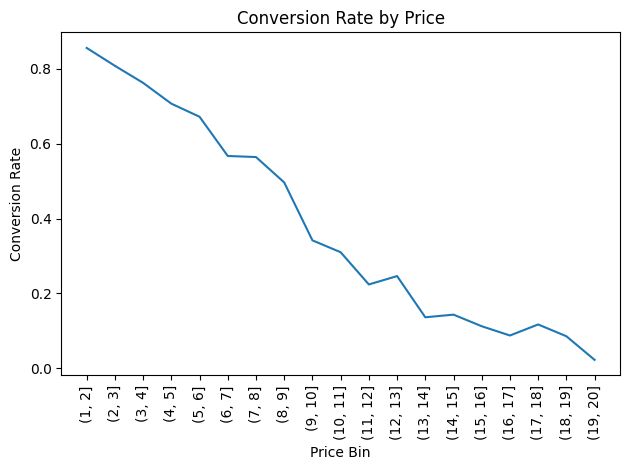

In [14]:
plt.figure()
plt.plot(summary['price_bin'].astype(str), summary['conversion_rate'])
plt.xticks(rotation=90)
plt.xlabel('Price Bin')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Price')
plt.tight_layout()
plt.show()

## 5. Revenue Analysis

Revenue depends on both price and conversion. We estimate expected revenue at each price level.

In [15]:
summary['mid_price'] = summary['price_bin'].apply(lambda x: float(x.mid))

summary['expected_revenue'] = (
    summary['mid_price'].astype(float)
    * summary['conversion_rate'].astype(float)
    * summary['count'].astype(float)
)

## 6. Revenue by Price

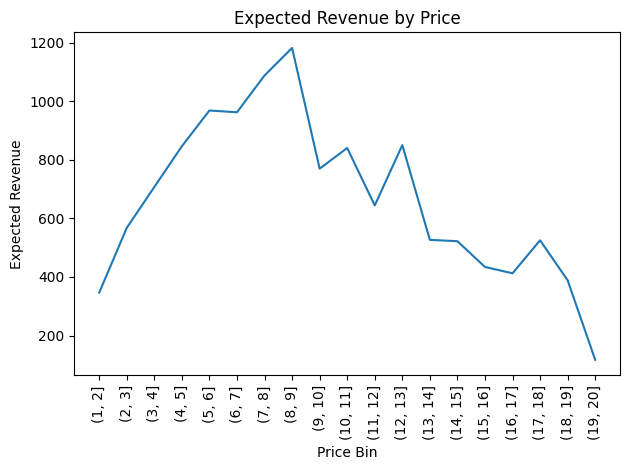

In [16]:
plt.figure()
plt.plot(summary['price_bin'].astype(str), summary['expected_revenue'])
plt.xticks(rotation=90)
plt.xlabel('Price Bin')
plt.ylabel('Expected Revenue')
plt.title('Expected Revenue by Price')
plt.tight_layout()
plt.show()

## 7. Key Takeaways

- Conversion rate declines as price increases, reflecting price sensitivity.
- Revenue peaks at a mid-range price where price and demand are balanced.
- This analysis illustrates how pricing decisions can be informed by simulated demand modeling.

In a real-world setting, this framework could be extended using A/B tests, real customer segments, or elasticity estimates by cohort.